In [ ]:
pip install -i https://test.pypi.org/simple/ drishtypy==0.0.6.19

Looking in indexes: https://test.pypi.org/simple/


In [ ]:
import drishtypy.utils.get_cuda as cuda
device = cuda.get_device()

cuda available
Device set to :  cuda:0


In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=128

In [ ]:
import os 
path = os.getcwd()
path

'/content'

In [ ]:

import drishtypy.data.returns_dataloader as dl

trainset, testset, train_loader, test_loader = dl.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content']
Running over Cuda !!  True


Extracting /content/cifar-10-python.tar.gz to /content
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

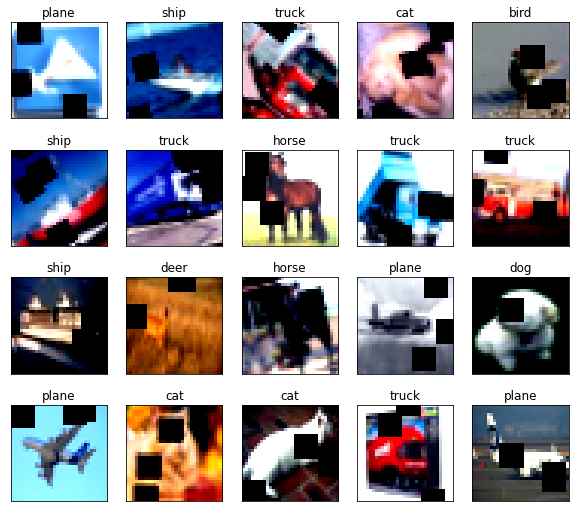

In [ ]:
import drishtypy.viz.do_plots as plt
plt.plot_dataset_images(device, classes, train_loader)

In [ ]:
import drishtypy.models.resnet as mod
model = mod.ResNet18()

In [ ]:
from drishtypy.learner.learner import model_summary
model_summary(model, device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
from tqdm import tqdm
from drishtypy.learner.learner import build_model

In [ ]:
# build and train the model
model_name = "Model CIFAR10"
EPOCHS = 50
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=False,
                                                            L2_penalty_val=0.001)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.221365, Accuracy: 5643/10000 (56.43%)

EPOCH: 1


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.982482, Accuracy: 6561/10000 (65.61%)

EPOCH: 2


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.068737, Accuracy: 6545/10000 (65.45%)

EPOCH: 3


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.877038, Accuracy: 7062/10000 (70.62%)

EPOCH: 4


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.763726, Accuracy: 7382/10000 (73.82%)

EPOCH: 5


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.725875, Accuracy: 7566/10000 (75.66%)

EPOCH: 6


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.691986, Accuracy: 7560/10000 (75.60%)

EPOCH: 7


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.592512, Accuracy: 7995/10000 (79.95%)

EPOCH: 8


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.863185, Accuracy: 7228/10000 (72.28%)

EPOCH: 9


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.652834, Accuracy: 7739/10000 (77.39%)

EPOCH: 10


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.552276, Accuracy: 8123/10000 (81.23%)

EPOCH: 11


Loss=0.669035 Batch_id=390 Accuracy=76.85: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s]

Epoch    12: reducing learning rate of group 0 to 3.0000e-03.



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.569946, Accuracy: 8046/10000 (80.46%)

EPOCH: 12


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.359104, Accuracy: 8786/10000 (87.86%)

EPOCH: 13


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.333987, Accuracy: 8870/10000 (88.70%)

EPOCH: 14


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.322118, Accuracy: 8924/10000 (89.24%)

EPOCH: 15


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.317840, Accuracy: 8953/10000 (89.53%)

EPOCH: 16


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.319083, Accuracy: 8918/10000 (89.18%)

EPOCH: 17


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.313602, Accuracy: 8948/10000 (89.48%)

EPOCH: 18


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.308709, Accuracy: 8960/10000 (89.60%)

EPOCH: 19


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.303333, Accuracy: 8998/10000 (89.98%)

EPOCH: 20


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.316882, Accuracy: 8977/10000 (89.77%)

EPOCH: 21


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.313983, Accuracy: 8915/10000 (89.15%)

EPOCH: 22


Loss=0.267580 Batch_id=390 Accuracy=90.93: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]

Epoch    23: reducing learning rate of group 0 to 3.0000e-04.



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.303632, Accuracy: 8980/10000 (89.80%)

EPOCH: 23


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.274203, Accuracy: 9095/10000 (90.95%)

EPOCH: 24


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.267917, Accuracy: 9092/10000 (90.92%)

EPOCH: 25


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.269434, Accuracy: 9093/10000 (90.93%)

EPOCH: 26


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.266033, Accuracy: 9111/10000 (91.11%)

EPOCH: 27


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.267119, Accuracy: 9129/10000 (91.29%)

EPOCH: 28


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.265618, Accuracy: 9111/10000 (91.11%)

EPOCH: 29


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.265208, Accuracy: 9110/10000 (91.10%)

EPOCH: 30


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.261093, Accuracy: 9126/10000 (91.26%)

EPOCH: 31


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.262376, Accuracy: 9131/10000 (91.31%)

EPOCH: 32


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.267608, Accuracy: 9135/10000 (91.35%)

EPOCH: 33


Loss=0.171127 Batch_id=390 Accuracy=94.36: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]

Epoch    34: reducing learning rate of group 0 to 3.0000e-05.



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.266130, Accuracy: 9140/10000 (91.40%)

EPOCH: 34


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.262493, Accuracy: 9139/10000 (91.39%)

EPOCH: 35


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.260584, Accuracy: 9134/10000 (91.34%)

EPOCH: 36


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.261918, Accuracy: 9143/10000 (91.43%)

EPOCH: 37


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.261423, Accuracy: 9143/10000 (91.43%)

EPOCH: 38


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.259875, Accuracy: 9132/10000 (91.32%)

EPOCH: 39


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.259563, Accuracy: 9141/10000 (91.41%)

EPOCH: 40


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.258497, Accuracy: 9139/10000 (91.39%)

EPOCH: 41


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.263564, Accuracy: 9144/10000 (91.44%)

EPOCH: 42


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.258839, Accuracy: 9139/10000 (91.39%)

EPOCH: 43


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.259187, Accuracy: 9135/10000 (91.35%)

EPOCH: 44


Loss=0.165633 Batch_id=390 Accuracy=94.58: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s]

Epoch    45: reducing learning rate of group 0 to 3.0000e-06.



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.259227, Accuracy: 9143/10000 (91.43%)

EPOCH: 45


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.258718, Accuracy: 9140/10000 (91.40%)

EPOCH: 46


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.260088, Accuracy: 9145/10000 (91.45%)

EPOCH: 47


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.263632, Accuracy: 9142/10000 (91.42%)

EPOCH: 48


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.255238, Accuracy: 9154/10000 (91.54%)

EPOCH: 49


Loss=0.166288 Batch_id=390 Accuracy=94.55: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]



Test set: Average loss: 0.260352, Accuracy: 9135/10000 (91.35%)




Ploting Accuracy and Loss history: Model CIFAR10



/usr/local/lib/python3.6/dist-packages/drishtypy/viz/do_plots.py:27: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1, x_size + 1), x_size / 10)
/usr/local/lib/python3.6/dist-packages/drishtypy/viz/do_plots.py:38: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1, x_size + 1), x_size / 10)


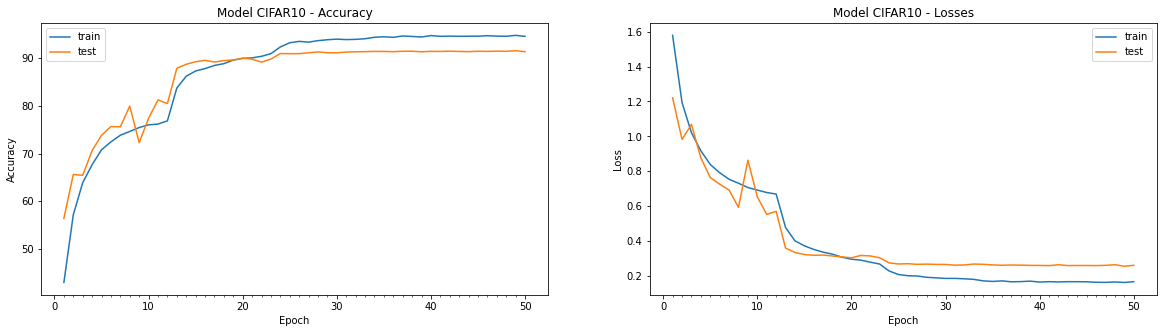

In [ ]:
from drishtypy.viz.do_plots import  plot_model_history
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")

Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254


/usr/local/lib/python3.6/dist-packages/drishtypy/viz/gradcam/gradcam_abs.py:67: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  wrong_idx = (pred_marker == False).nonzero()  # get indices for wrong predictions
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


FileNotFoundError: ignored

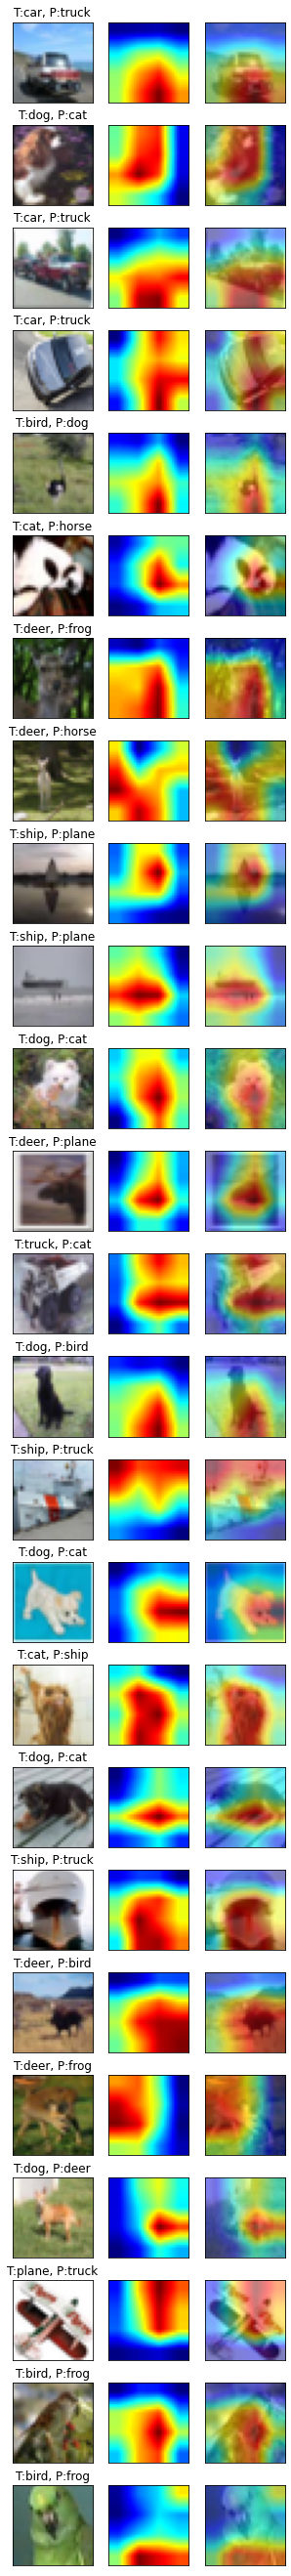

In [ ]:
# import gradcam.gradcam_abs as gradcamAbs1
import drishtypy.viz.gradcam.gradcam_abs as gradcamAbs1
from drishtypy.data.data_utils import find_stats
means,stds = find_stats(path)
config = dict(model_type='resnet', arch=model, layer_name='layer4')
gcam = gradcamAbs1.GradCamAbs(device, config, means, stds)

gradcam_images, pred_results = gcam.applyOnMisclassifiedImages(dataloader=test_loader, num_of_images=25)

gcam.plot_results(gradcam_images, pred_results, classes, save_filename="gradcam_result_details")